<a href="https://colab.research.google.com/github/Quantzaar/Strategy/blob/main/backtest%20results/backtest_nifty500_1y1m_commonstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Initial Stock Selection:
# At the start of each month, select the top 30 stocks from NIFTY500
# based on their 1-year return.
# Performance Check:
# For the next month, check how many of those selected top 30 stocks
# are in the top 30 stocks based on the 1-month return.
# Backtesting:
# Perform this test over the last 10 years to check how many stocks
# remain in the top performers in subsequent months.
# Result:
# Plot the number of stocks each month that remain in the top performers based
# on 1-month return out of the previously selected top 30 stocks based on the 1-year return.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# from google.colab import drive
# drive.mount('/content/drive')

# filepath = r"/content/drive/MyDrive/Quantzaar-tradingS, InvestmentS, Trade&investMyTheory/Backtesting/ind_nifty500list.csv"
# df=pd.read_csv(filepath)
# nifty500_symbols = df.Symbol + '.NS'

# Step 1: Get the NIFTY 500 stock symbols
nifty500_url = "https://en.wikipedia.org/wiki/NIFTY_500"
nifty500_symbols = pd.read_html(nifty500_url)[2][3][1:] + '.NS'

# Step 2: Download historical data for the NIFTY 500 stocks
df = yf.download(nifty500_symbols.to_list(), start='2013-01-01', end=datetime.now().strftime('%Y-%m-%d'))['Adj Close']



[*********************100%***********************]  502 of 502 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DUMMYSANOF.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


<ipython-input-6-f09fd6184877>:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_12mo_ret = df_monthly.pct_change(12)  # 12-month returns (1-year return)
<ipython-input-6-f09fd6184877>:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_11mo_ret = df_monthly.pct_change(11)  # 11-month returns
<ipython-input-6-f09fd6184877>:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_6mo_ret = df_mo

Backtesting for 1-Year Return:


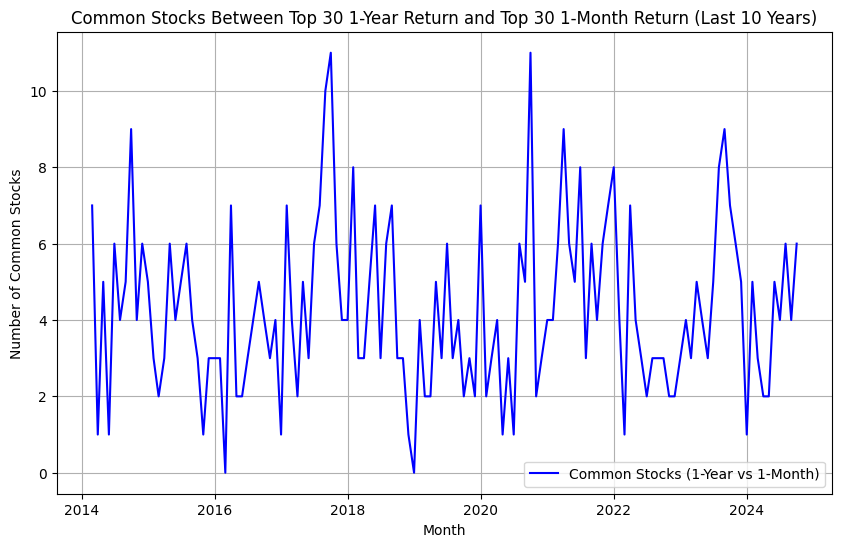

Average number of common stocks per month (1-Year): 4.27

Backtesting for 11-Month Return:


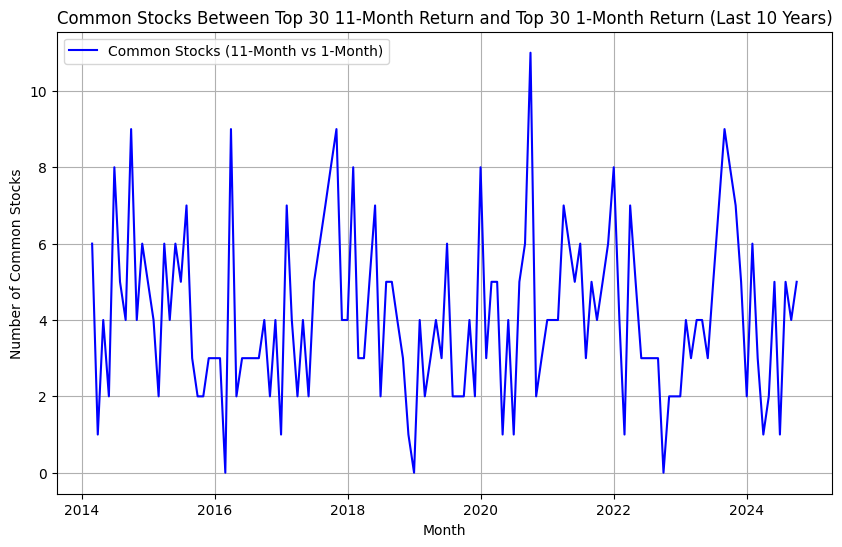

Average number of common stocks per month (11-Month): 4.13

Backtesting for 6-Month Return:


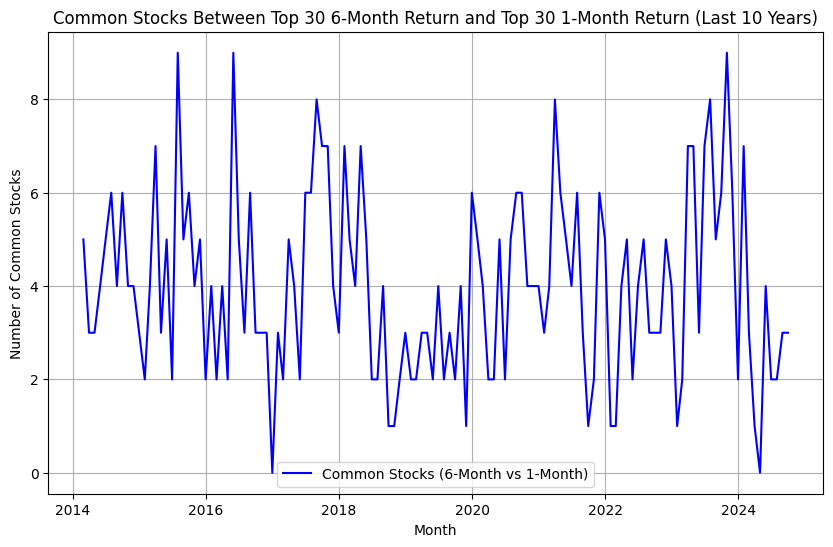

Average number of common stocks per month (6-Month): 3.98

Backtesting for 3-Month Return:


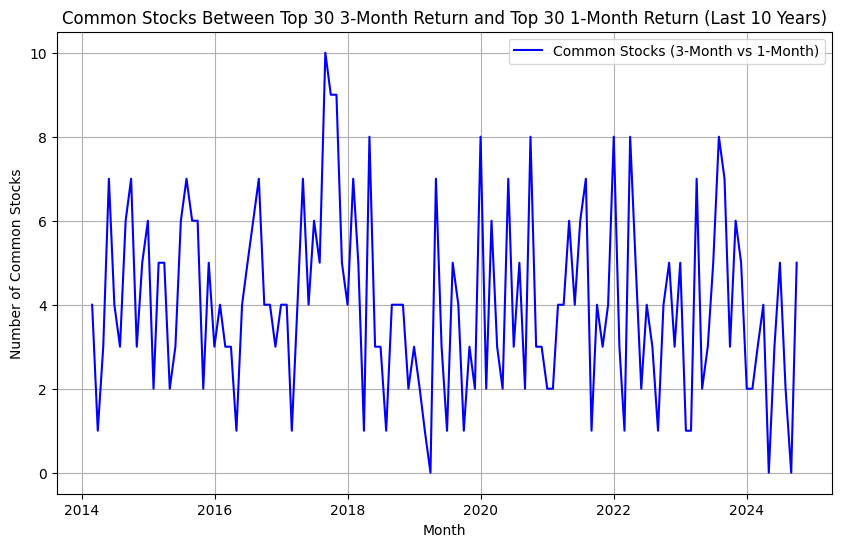

Average number of common stocks per month (3-Month): 4.03



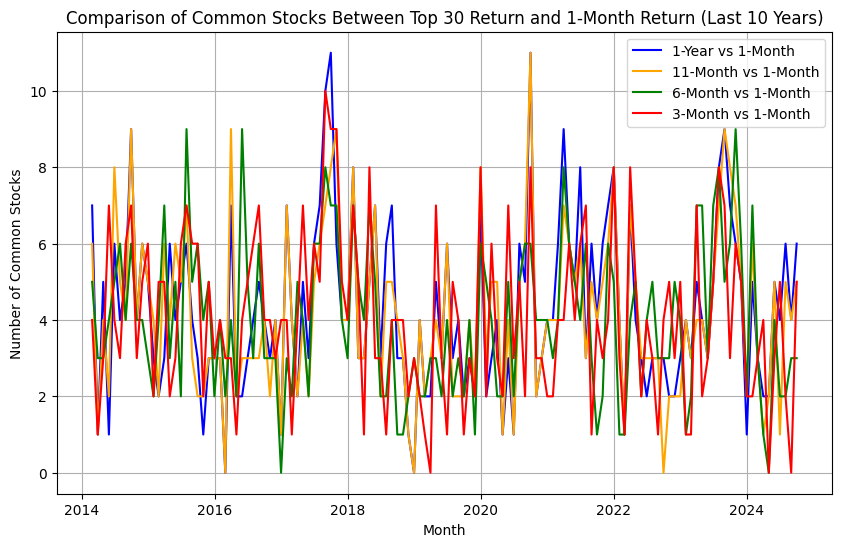

In [6]:
# Step 3: Calculate 12-month, 11-month, 6-month, and 3-month returns
df_monthly = df.resample('M').ffill()  # Resample to monthly frequency
df_12mo_ret = df_monthly.pct_change(12)  # 12-month returns (1-year return)
df_11mo_ret = df_monthly.pct_change(11)  # 11-month returns
df_6mo_ret = df_monthly.pct_change(6)    # 6-month returns
df_3mo_ret = df_monthly.pct_change(3)    # 3-month returns
df_1mo_ret = df_monthly.pct_change(1)    # 1-month returns

# Step 4: Function to backtest strategy and count common stocks
def backtest_strategy(df_long_term_ret, df_short_term_ret, period_name):
    common_counts = []
    months = []

    for date in df_short_term_ret.index[12:-1]:  # Start after the first 12 months (for the 1-year returns)
        # Get the top 30 stocks based on long-term return (1-year, 11-month, 6-month, or 3-month)
        top30_long_term = df_long_term_ret.loc[date].nlargest(30).index

        # Get the top 30 stocks based on 1-month return for the following month
        next_month_date = df_short_term_ret.index[df_short_term_ret.index.get_loc(date) + 1]
        top30_1mo = df_short_term_ret.loc[next_month_date].nlargest(30).index

        # Find the common stocks between the two lists
        common_stocks = set(top30_long_term).intersection(set(top30_1mo))

        # Append the number of common stocks and the month
        common_counts.append(len(common_stocks))
        months.append(next_month_date)

    # Plot the results for the given period (1-year, 11-month, 6-month, or 3-month)
    plt.figure(figsize=(10, 6))
    plt.plot(months, common_counts, label=f'Common Stocks ({period_name} vs 1-Month)', color='blue')
    plt.title(f'Common Stocks Between Top 30 {period_name} Return and Top 30 1-Month Return (Last 10 Years)')
    plt.xlabel('Month')
    plt.ylabel('Number of Common Stocks')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Calculate average common stock count
    average_common = np.mean(common_counts)
    print(f"Average number of common stocks per month ({period_name}): {average_common:.2f}\n")

    return common_counts, months

# Step 5: Backtest for 1-Year, 11-Month, 6-Month, and 3-Month returns
print("Backtesting for 1-Year Return:")
common_counts_12mo, months_12mo = backtest_strategy(df_12mo_ret, df_1mo_ret, "1-Year")

print("Backtesting for 11-Month Return:")
common_counts_11mo, months_11mo = backtest_strategy(df_11mo_ret, df_1mo_ret, "11-Month")

print("Backtesting for 6-Month Return:")
common_counts_6mo, months_6mo = backtest_strategy(df_6mo_ret, df_1mo_ret, "6-Month")

print("Backtesting for 3-Month Return:")
common_counts_3mo, months_3mo = backtest_strategy(df_3mo_ret, df_1mo_ret, "3-Month")

# Step 6: Plot combined comparison
plt.figure(figsize=(10, 6))
plt.plot(months_12mo, common_counts_12mo, label='1-Year vs 1-Month', color='blue')
plt.plot(months_11mo, common_counts_11mo, label='11-Month vs 1-Month', color='orange')
plt.plot(months_6mo, common_counts_6mo, label='6-Month vs 1-Month', color='green')
plt.plot(months_3mo, common_counts_3mo, label='3-Month vs 1-Month', color='red')
plt.title('Comparison of Common Stocks Between Top 30 Return and 1-Month Return (Last 10 Years)')
plt.xlabel('Month')
plt.ylabel('Number of Common Stocks')
plt.grid(True)
plt.legend()
plt.show()



In [28]:
df_monthly.head()

Ticker,360ONE.NS,3MINDIA.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ACE.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-31 00:00:00+00:00,NaN,3794.012939,21.326975,NaN,555.652283,1301.818359,NaN,NaN,1112.927612,17.258224,...,6.878506,NaN,230.623520,140.765671,95.501144,213.764465,41.642723,1533.724121,NaN,152.392410
2013-02-28 00:00:00+00:00,NaN,3372.418701,18.149462,NaN,491.492432,1226.388184,NaN,NaN,1070.407593,11.147880,...,6.161904,NaN,212.430496,142.424530,86.328728,202.523468,36.955563,1421.699341,NaN,133.875778
2013-03-31 00:00:00+00:00,NaN,3597.725586,17.373014,NaN,418.387054,1203.957397,NaN,NaN,991.472229,10.961306,...,5.840077,NaN,215.543747,149.521835,78.445740,195.509460,39.820396,1366.497070,NaN,130.733948
2013-04-30 00:00:00+00:00,NaN,3382.092041,19.831762,NaN,449.064545,1280.305664,NaN,NaN,1054.850586,10.728087,...,5.402395,NaN,202.409729,119.148872,91.751694,217.294678,40.255451,1326.176025,NaN,138.214539
2013-05-31 00:00:00+00:00,NaN,3440.465820,18.925907,NaN,552.370178,1290.271973,NaN,NaN,1042.406128,12.080757,...,4.857434,NaN,210.922516,112.068680,90.188423,210.048431,40.805431,1615.053955,NaN,136.295990


In [10]:
df_12mo_ret[11:]

Ticker,360ONE.NS,3MINDIA.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ACE.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-31 00:00:00+00:00,NaN,-0.088717,0.032574,NaN,-0.100804,0.147918,NaN,NaN,-0.215920,-0.296674,...,0.133542,NaN,-0.244885,0.425121,-0.403785,0.167615,0.553466,0.187363,NaN,-0.043641
2014-02-28 00:00:00+00:00,NaN,0.043479,0.349847,NaN,0.256742,0.279861,NaN,NaN,-0.108925,0.011973,...,0.481424,NaN,-0.107625,0.462899,-0.346226,0.242830,0.809714,0.212120,NaN,0.372247
2014-03-31 00:00:00+00:00,NaN,-0.060948,0.607797,NaN,0.758463,0.326953,NaN,NaN,0.218564,0.246328,...,0.530385,NaN,0.043105,0.267355,-0.023363,0.300114,0.591880,0.466209,NaN,0.393600
2014-04-30 00:00:00+00:00,NaN,0.062950,0.504767,NaN,0.626850,0.295738,NaN,NaN,0.058152,0.650568,...,1.121769,NaN,0.092045,0.529377,-0.110937,0.132048,0.517793,0.638250,NaN,0.258049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 00:00:00+00:00,0.905040,0.331970,0.197833,0.142326,1.025808,0.205695,0.314445,0.427898,0.440134,2.038200,...,0.481242,0.081096,0.053407,0.087909,0.419753,-0.236606,0.668975,0.638026,1.594497,1.029258
2024-06-30 00:00:00+00:00,1.212764,0.367324,0.367144,0.205700,0.929023,0.194202,0.216047,0.465837,0.455554,2.037748,...,0.663234,-0.015174,0.359888,0.325833,0.457846,-0.144122,0.953028,0.281361,1.672352,0.877212
2024-07-31 00:00:00+00:00,1.212244,0.363831,0.604140,0.081902,0.742914,0.196376,0.158733,0.540220,0.287498,0.933589,...,0.674934,-0.111497,0.477908,0.291478,0.564012,-0.386548,0.614948,0.223468,1.728300,0.977557


In [11]:
df_1mo_ret

Ticker,360ONE.NS,3MINDIA.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ACE.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28 00:00:00+00:00,NaN,-0.111121,-0.148990,NaN,-0.115468,-0.057942,NaN,NaN,-0.038206,-0.354054,...,-0.104180,NaN,-0.078886,0.011785,-0.096045,-0.052586,-0.112557,-0.073041,NaN,-0.121506
2013-03-31 00:00:00+00:00,NaN,0.066809,-0.042781,NaN,-0.148742,-0.018290,NaN,NaN,-0.073743,-0.016736,...,-0.052228,NaN,0.014655,0.049832,-0.091314,-0.034633,0.077521,-0.038828,NaN,-0.023468
2013-04-30 00:00:00+00:00,NaN,-0.059936,0.141527,NaN,0.073323,0.063414,NaN,NaN,0.063923,-0.021276,...,-0.074945,NaN,-0.060934,-0.203134,0.169620,0.111428,0.010925,-0.029507,NaN,0.057220
2013-05-31 00:00:00+00:00,NaN,0.017260,-0.045677,NaN,0.230046,0.007784,NaN,NaN,-0.011797,0.126087,...,-0.100874,NaN,0.042057,-0.059423,-0.017038,-0.033348,0.013662,0.217828,NaN,-0.013881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 00:00:00+00:00,-0.005637,0.095736,-0.175396,-0.016809,0.276258,-0.021111,-0.032627,0.093726,0.005767,-0.057019,...,-0.090394,-0.020637,-0.005708,-0.052336,-0.120459,0.013270,-0.005137,0.272011,-0.072483,0.048870
2024-06-30 00:00:00+00:00,0.262836,0.102420,0.121965,0.160508,0.020792,0.067072,0.066384,0.085173,0.031465,0.038193,...,0.127730,0.011138,0.333878,0.174920,0.030000,0.019409,0.224963,-0.106812,0.119509,0.073789
2024-07-31 00:00:00+00:00,0.155231,0.071763,0.092802,-0.095758,-0.069963,0.042390,-0.049558,0.101073,-0.010844,-0.062882,...,0.194390,-0.013159,0.075801,0.013888,0.119038,-0.020555,0.071037,0.019173,0.144047,0.164217


In [27]:
print(df_12mo_ret.loc[df_1mo_ret[12:].index[0]])

print(df_12mo_ret.loc[df_1mo_ret[12:].index[0]].nlargest(30).index)

Ticker
360ONE.NS             NaN
3MINDIA.NS      -0.088717
AARTIIND.NS      0.032574
AAVAS.NS              NaN
ABB.NS          -0.100804
                   ...   
ZEEL.NS          0.167615
ZENSARTECH.NS    0.553466
ZFCVINDIA.NS     0.187363
ZOMATO.NS             NaN
ZYDUSLIFE.NS    -0.043641
Name: 2014-01-31 00:00:00+00:00, Length: 502, dtype: float64
Index(['VAIBHAVGBL.NS', 'CEATLTD.NS', 'APLLTD.NS', 'AUROPHARMA.NS',
       'ASTRAL.NS', 'AJANTPHARM.NS', 'FSL.NS', 'HCLTECH.NS', 'CYIENT.NS',
       'FINPIPE.NS', 'ECLERX.NS', 'PIIND.NS', 'TATAELXSI.NS', 'ESCORTS.NS',
       'GRANULES.NS', 'BRITANNIA.NS', 'TVSMOTOR.NS', 'CERA.NS', 'TECHM.NS',
       'PERSISTENT.NS', 'AVANTIFEED.NS', 'PAGEIND.NS', 'IPCALAB.NS',
       'BLUEDART.NS', 'TCS.NS', 'SONATSOFTW.NS', 'EICHERMOT.NS',
       'SUNPHARMA.NS', 'NATCOPHARM.NS', 'TRIDENT.NS'],
      dtype='object', name='Ticker')


In [25]:
print(df_1mo_ret.loc[df_1mo_ret[13:].index[0]].nlargest(30).index)

Index(['AVANTIFEED.NS', 'CIEINDIA.NS', 'JBMA.NS', 'TATAELXSI.NS',
       'DEEPAKNTR.NS', 'MUTHOOTFIN.NS', 'SONATSOFTW.NS', 'GODFRYPHLP.NS',
       'PFC.NS', 'NAUKRI.NS', 'BALRAMCHIN.NS', 'ZYDUSLIFE.NS', 'DCMSHRIRAM.NS',
       'VOLTAS.NS', 'ALLCARGO.NS', 'ASTRAZEN.NS', 'ABB.NS', 'IIFL.NS',
       'JAIBALAJI.NS', 'JKLAKSHMI.NS', 'FINPIPE.NS', 'VIPIND.NS', 'APLLTD.NS',
       'BALKRISIND.NS', 'MASTEK.NS', 'INDHOTEL.NS', 'TATAMOTORS.NS',
       'PERSISTENT.NS', 'GRANULES.NS', 'CUMMINSIND.NS'],
      dtype='object', name='Ticker')


In [26]:
a = df_12mo_ret.loc[df_1mo_ret[12:].index[0]].nlargest(30).index
b = df_1mo_ret.loc[df_1mo_ret[13:].index[0]].nlargest(30).index
print(set(a).intersection(set(b)))

{'APLLTD.NS', 'FINPIPE.NS', 'TATAELXSI.NS', 'AVANTIFEED.NS', 'GRANULES.NS', 'SONATSOFTW.NS', 'PERSISTENT.NS'}
